In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
    # per desfer la opció: https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf

In [2]:
rounddf=pd.read_csv("round.csv")
sessiondf=pd.read_csv("session.csv")
userdf=pd.read_csv("user.csv")
userrounddf=pd.read_csv("userround.csv")
qadf=pd.read_excel("QuestionsAnswersSurvey.xlsx")
display(sessiondf)

,id,wealth,goal_reached,total_pot
0,1,EQUAL,1,136
1,2,EQUAL,1,184
2,3,UNEQUAL,1,132
3,4,EQUAL,1,122
4,5,UNEQUAL,1,152
5,6,EQUAL,1,142
6,7,UNEQUAL,1,150
7,8,EQUAL,1,124
8,9,UNEQUAL,1,154
9,10,EQUAL,1,134


In [5]:
# number of games with and without odd options and with equality and inequality
ineqs=0
for k in range(len(sessiondf)):
    if (sessiondf.loc[k,"wealth"]=="UNEQUAL"):
        ineqs+=1
print(ineqs,len(sessiondf)-ineqs)

13 14


In [ ]:
# no es poden fer perquè no hi ha registre del temps:
    # mean time for each round with violinplot
    # correlation between time and round with threshold achieved
    # mean time depending on gender
    # mean time depending on contribution

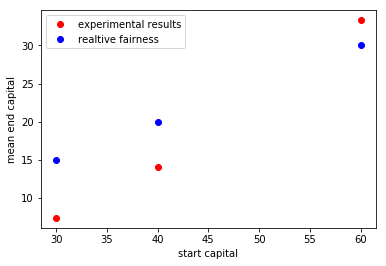

In [33]:
# mean end capital as a function of start capital
scvector=[30.0,40.0,60.0]
sumvector=[0.0,0.0,0.0]
counter=[0,0,0,0,0]
for i in range(len(userdf)):
    for k in range(3):
        if (userdf.loc[i,"endowment_initial"]==scvector[k]):
            sumvector[k]=sumvector[k]+userdf.loc[i,"winnings_public_goods"]
            counter[k]=counter[k]+1
for k in range(3):
    sumvector[k]=sumvector[k]/float(counter[k])
plt.plot(scvector,sumvector,"ro",label="experimental results")
fairvector=list(range(3))
for i in range(3):
    fairvector[i]=0.5*scvector[i]
plt.plot(scvector,fairvector,"bo",label="realtive fairness")
plt.xlabel("start capital")
plt.ylabel("mean end capital")
plt.legend()
plt.show()

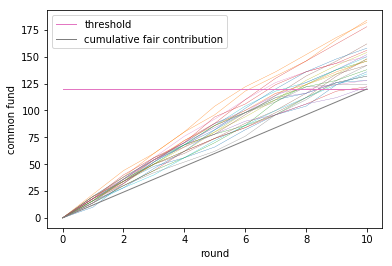

In [30]:
# evolution of funds through the rounds
roundi=list(range(0,11))
roundlist=(0,1,2,3,4,5,6,7,8,9,10)
for i in range(1,len(sessiondf)):
    roundi=rounddf.loc[rounddf["session_id"]==i]
    roundi=roundi[["end_pot"]]
    roundi.index=roundi.index%10
    roundi.loc[-1] = [120]
    roundi.index = roundi.index + 1
    roundi.sort_index(inplace=True)
    for j in range (0,11):
        roundi.loc[j]=120-roundi.loc[j]
    plt.plot(roundlist,roundi,lw=0.3)
plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
plt.xlabel("round")
plt.ylabel("common fund")
plt.legend()
plt.show()

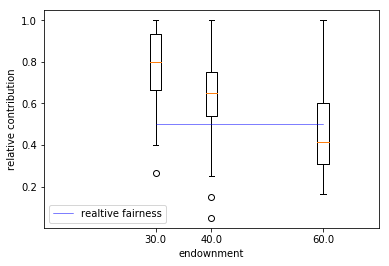

In [31]:
# relative contributions as a function of start capital with boxplot
scvect=[30.0,40.0,60.0]
data=[[],[],[]]
for k in range(3):
    for i in range(len(userdf)):
        if (userdf.loc[i,"endowment_initial"]==scvect[k]):
            data[k].append(1-userdf.loc[i,"winnings"]/scvect[k])
plt.boxplot(data,positions=scvect,widths=2)
fairvector=(0.5,0.5,0.5)
plt.plot(scvect,fairvector,"b-",lw=0.5,label="realtive fairness")
plt.xlabel("endownment")
plt.ylabel("relative contribution")
plt.xlim([10.0,70.0])
plt.legend()
plt.show()

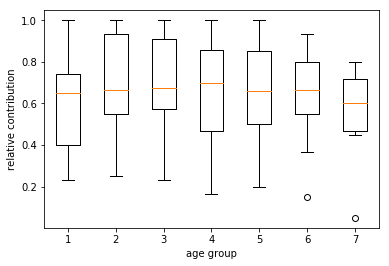

In [39]:
# relative contribution dependence on age
data=[[],[],[],[],[],[],[]]
for k in range(7):
    for i in range(len(userdf)):
        if (int(userdf.loc[i,"age_range"][1:])==(k+1)):
            data[k].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"endowment_initial"])
plt.boxplot(data,positions=[1,2,3,4,5,6,7])
plt.xlabel("age group")
plt.ylabel("relative contribution")
plt.show()

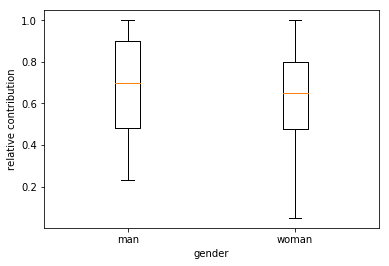

In [42]:
# relative contribution dependence on gender
data=[[],[]]
for i in range(len(userdf)):
    if (userdf.loc[i,"gender"]=="M"):
        data[0].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"endowment_initial"])
    if (userdf.loc[i,"gender"]=="F"):
        data[1].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"endowment_initial"])
plt.boxplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("relative contribution")
plt.show()

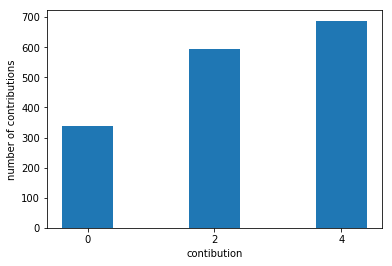

0.20864197530864198 0.36666666666666664 0.4246913580246914


In [4]:
# number of contribution of each value
count=[0,0,0]
for i in range(len(userrounddf)):
    for n in range(3):
        if (userrounddf.loc[i,"option_selected"]==2*n):
            count[n]+=1
plt.bar([0,2,4],count)
plt.xticks([0,2,4],[0,2,4])
plt.xlabel("contibution")
plt.ylabel("number of contributions")
plt.show()
print(count[0]/len(userrounddf),count[1]/len(userrounddf),count[2]/len(userrounddf))

In [10]:
# Gini coefficient
def gini(dataset):
    sum1=0.0
    sum2=0.0
    n=len(dataset)
    for i in range(n):
        sum1+=dataset[i]
        for j in range(n):
            sum2+=abs(dataset[i]-dataset[j])
    gini=sum2/(2*n*sum1)
    return gini
incomein_e=[]
incomein_u=[]
income_e=[]
income_u=[]
for k in range(len(userdf)):
    if (math.isnan(float(userdf.loc[k,"session_id"]))==False):
        if(sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="EQUAL"):
            incomein_e.append(userdf.loc[k,"endowment_initial"])
            income_e.append(int(userdf.loc[k,"winnings"]))
        elif(sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="UNEQUAL"):
            incomein_u.append(userdf.loc[k,"endowment_initial"])
            income_u.append(int(userdf.loc[k,"winnings"]))
inigini_e=gini(incomein_e)
inigini_u=gini(incomein_u)
gini_e=gini(income_e)
gini_u=gini(income_u)
print("Equal: Initial Gini=",inigini_e,", Final Gini=",gini_e,", \u0394Gini=", gini_e-inigini_e)
print("Unequal: Initial Gini=",inigini_u,",Final Gini=",gini_u,", \u0394Gini=", gini_u-inigini_u)

Equal: Initial Gini= 0.0 , Final Gini= 0.31689621249385147 , ΔGini= 0.31689621249385147
Unequal: Initial Gini= 0.16719203126970117 ,Final Gini= 0.5009097183010226 , ΔGini= 0.33371768703132143


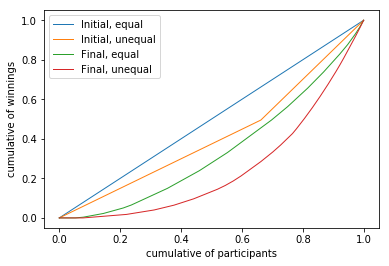

In [4]:
# Lorenz curve
def lorenz(dataset,Label):
    cumulative=[0]
    xaxis=[0]
    for i in range(len(dataset)):
        cumulative.append(cumulative[i]+dataset[i])
        xaxis.append((i+1)/len(dataset))
    for i in range(len(dataset)+1):
        cumulative[i]=cumulative[i]/max(cumulative)
    plt.plot(xaxis,cumulative,lw=1,label=Label)
    return
incomein_e=[]
incomein_u=[]
income_e=[]
income_u=[]
for k in range(len(userdf)):
    if (math.isnan(float(userdf.loc[k,"session_id"]))==False):
        if(sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="EQUAL"):
            incomein_e.append(userdf.loc[k,"endowment_initial"])
            income_e.append(int(userdf.loc[k,"winnings"]))
        elif(sessiondf.loc[int(userdf.loc[k,"session_id"])-1,"wealth"]=="UNEQUAL"):
            incomein_u.append(userdf.loc[k,"endowment_initial"])
            income_u.append(int(userdf.loc[k,"winnings"]))
incomein_e.sort()
incomein_u.sort()
income_e.sort()
income_u.sort()
lorenz(incomein_e,"Initial, equal")
lorenz(incomein_u,"Initial, unequal")
lorenz(income_e,"Final, equal")
lorenz(income_u,"Final, unequal")
plt.xlabel("cumulative of participants")
plt.ylabel("cumulative of winnings")
plt.legend()
plt.show()

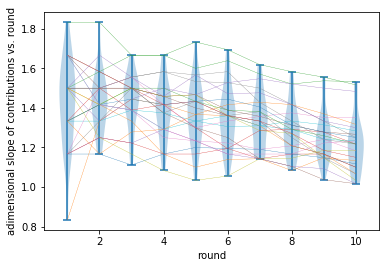

0.8333333333333334 1.8333333333333333


In [48]:
hurry=[[] for i in range(10)]
for n in range(len(rounddf)):
    hurry[rounddf.loc[n,"num_round"]-1].append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
plt.violinplot(hurry)
for n in range(len(rounddf)):
    if (rounddf.loc[n,"num_round"]==1):
        rlzn=[]
    rlzn.append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
    if (rounddf.loc[n,"num_round"]==10):
        plt.plot([(i+1) for i in range(10)],rlzn,lw=0.3)
plt.xlabel("round")
plt.ylabel("adimensional slope of contributions vs. round")
plt.show()
print(np.min(hurry),np.max(hurry))

In [11]:
fails=0
for k in range(len(sessiondf)):
    if(sessiondf.loc[k,"goal_reached"]==0):
        fails+=1
print(fails)

0
